# Assignment 2: Data Analysis and Visualization with Python

## 1. Objective: Explore Washington D.C. Bike Rental Dataset

The dataset can be downloaded from Kaggle here (you only need the train.csv). It provides hourly bike rental numbers in Washington D.C. for the years 2011 and 2012. The objective is to explore the effect that different weather and temporal factors have on the number of bikes rented.


## 2. Data Description

-datetime - hourly date + timestamp

-season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

-holiday - whether the day is considered a holiday

-workingday - whether the day is neither a weekend nor holiday

-weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
         - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
         - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
         - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

-temp - temperature in Celsius

-atemp - "feels like" temperature in Celsius

-humidity - relative humidity

-windspeed - wind speed

-casual - number of non-registered user rentals initiated

-registered - number of registered user rentals initiated

-count - number of total rentals

## 3. Tasks
### 3.1 Part I: Data Manipulation and Analysis

#### 1. Import the dataset into a pandas dataframe. Make sure that the date column is in pandas date time format.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data 

In [2]:
df = pd.read_csv("C:\\Users\\Anushree\\Desktop\\Data_V\\bike-sharing-demand\\train.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datetime column is object datatype. Change datatype to pandas datetime format.

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### 2. Check the data type of each column. How many rows are there in the dataset ? Does the dataset contain any missing values ?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
df.shape

(10886, 12)

There are 10886 rows.

In [10]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no null values.

#### 3. Using the date column, create new columns for: year, month, day of the week and hour of the day.

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_the_week'] = df['datetime'].dt.day_name()
df['hour_of_day'] = df['datetime'].dt.hour

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_the_week,hour_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


#### 4. Rename the values in the season column to spring, summer, fall and winter.

In [14]:
season_values = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

In [15]:
df['season'].replace(season_values, inplace=True)

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_the_week,hour_of_day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


In [17]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_the_week,hour_of_day
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,Wednesday,22
10885,2012-12-19 23:00:00,winter,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,Wednesday,23


#### 5. Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.

In [18]:
df_1 = df[df['year'].isin([2011, 2012])]
total_rentals_by_year = df_1.groupby('year')[['casual', 'registered']].sum()

In [19]:
total_rentals_by_year

,casual,registered
year,,
2011,155817,626162
2012,236318,1067179


#### 6. Calculate the mean of the hourly total rentals count by season. Which season has the highest mean ?

In [20]:
season_mean = df.groupby("season")["count"].mean()
season_mean

season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64

Season with highest mean: Fall

#### 7. Are more bikes rented by registered users on working or non-working days ?? Does the answer differ for non-registered users ? Is the answer the same for both years ?

In [21]:
rentals_by_user_type = df.groupby(['workingday', 'year'])[['casual', 'registered']].mean()
print("Average rentals by user type and working day:\n", rentals_by_user_type)


Average rentals by user type and working day:
                     casual  registered
workingday year                       
0          2011  48.201276   97.153132
           2012  70.250286  160.767429
1          2011  19.664143  124.031909
           2012  30.527733  211.587507


OR

In [22]:
mean_rentals_by_day = df.groupby(['workingday', 'year'])[['registered', 'casual']].mean()
mean_rentals_by_day

registered     casual
workingday year                       
0          2011   97.153132  48.201276
           2012  160.767429  70.250286
1          2011  124.031909  19.664143
           2012  211.587507  30.527733

In [23]:
total_rentals_by_working_day = df.groupby("workingday")["count"].sum()
print(total_rentals_by_working_day)

workingday
0     654872
1    1430604
Name: count, dtype: int64


Based on the data,

Are more bikes rented by registered users on working or non-working days? More bikes are rented by registered users on working days (1) than on non-working days (0) for both years. For example, in 2011, the mean of registered rentals on working days was 124.031909, while on non-working days it was 97.153132.

Does the answer differ for non-registered users?
Yes, the answer is different for non-registered users (casual). More bikes are rented by casual users on non-working days (0) than on working days (1) for both years.For example, in 2011, the mean of casual rentals on working days was 19.664143, while on non-working days it was 48.201276.

Is the answer the same for both years? 
Yes, the answer is the same for both years (2011 and 2012). The trend of more registered rentals on working days and more casual rentals on non-working days is consistent for both years. For example, the mean of registered rentals on working days in 2011 was 124.031909, while in 2012 it was 211.587507. Similarly, the mean of casual rentals on non-working days in 2011 was 48.201276, while in 2012 it was 70.250286.

#### 8. Which months in the year 2011 have the highest and the lowest total number of bikes rented ? Repeat for the year 2012.

In [24]:
monthly_rentals = df.groupby(['year', 'month'])['count'].sum()
print("Month with the highest rentals in 2011:", monthly_rentals.loc[2011].idxmax())
print("Month with the lowest rentals in 2011:", monthly_rentals.loc[2011].idxmin())
print("Month with the highest rentals in 2012:", monthly_rentals.loc[2012].idxmax())
print("Month with the lowest rentals in 2012:", monthly_rentals.loc[2012].idxmin())

Month with the highest rentals in 2011: 7
Month with the lowest rentals in 2011: 1
Month with the highest rentals in 2012: 9
Month with the lowest rentals in 2012: 1


2011: Highest rentals: July, Lowest rentals: Jan

2012:Highest rentals: September, Lowest rentals: Jan

#### 9. Which type of weather have the highest and lowest mean of the hourly total rentals count ?

In [25]:
weather_means = df.groupby('weather')['count'].mean()
print("Weather Means:\n", weather_means)
print("Weather with the highest mean:", weather_means.idxmax())
print("Weather with the lowest mean:", weather_means.idxmin())

Weather Means:
 weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64
Weather with the highest mean: 1
Weather with the lowest mean: 3


Highest mean-  1: Clear, Few clouds, Partly cloudy, Partly cloudy 

Lowest mean-  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud

#### 10. Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count ?

In [26]:
df_num = df.select_dtypes(include=np.number)
correlations = df_num.corr()['count'].sort_values(ascending=False)
print("Correlations with total rentals count:\n", correlations)

Correlations with total rentals count:
 count          1.000000
registered     0.970948
casual         0.690414
hour_of_day    0.400601
temp           0.394454
atemp          0.389784
year           0.260403
month          0.166862
windspeed      0.101369
workingday     0.011594
holiday       -0.005393
weather       -0.128655
humidity      -0.317371
Name: count, dtype: float64


In [27]:
highest_correlation_column = correlations.index[1]  
highest_correlation_value = correlations.iloc[1]

print(f"Highest correlation is with '{highest_correlation_column}' column: {highest_correlation_value}")

Highest correlation is with 'registered' column: 0.9709481058098266


#### 11. Create a new categorical column called day_period, which can take four possible values: night, morning, afternoon and evening. These values correspond to the following binning of the hour column: 0-6: night, 6-12: morning, 12-6: afternoon, 6-24:evening.

In [28]:
bins = [0, 6, 12, 18, 24]
labels = ["night", "morning", "afternoon", "evening"]

# Create the new categorical column using pd.cut
df["day_period"] = pd.cut(df["hour_of_day"], bins=bins, labels=labels, include_lowest=True)


df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_the_week,hour_of_day,day_period
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0,night
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1,night
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2,night
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3,night
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4,night
5,2011-01-01 05:00:00,spring,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,Saturday,5,night
6,2011-01-01 06:00:00,spring,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,Saturday,6,night
7,2011-01-01 07:00:00,spring,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,Saturday,7,morning
8,2011-01-01 08:00:00,spring,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,Saturday,8,morning
9,2011-01-01 09:00:00,spring,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,Saturday,9,morning


#### 12. Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table ?

In [29]:
pivot_table = pd.pivot_table(data = df, index='day_period', columns='workingday', values='count', aggfunc='mean')
print("Pivot Table:\n", pivot_table)

Pivot Table:
 workingday           0           1
day_period                        
night        40.594648   28.786385
morning     217.625287  250.454594
afternoon   356.545977  315.552519
evening     157.769655  202.168489


From this table, it can observe that:

The mean of the hourly total rentals count is higher on working days (1) than on non-working days (0) for all day periods except night.
The mean of the hourly total rentals count is highest in the afternoon for both working and non-working days, followed by morning, evening, and night.
The difference between working and non-working days is largest in the evening, followed by night, morning, and afternoon.

## 3.2 Part II: Data Visualisation

#### 1. Plot the distributions of all the numerical columns in the dataset using histograms.

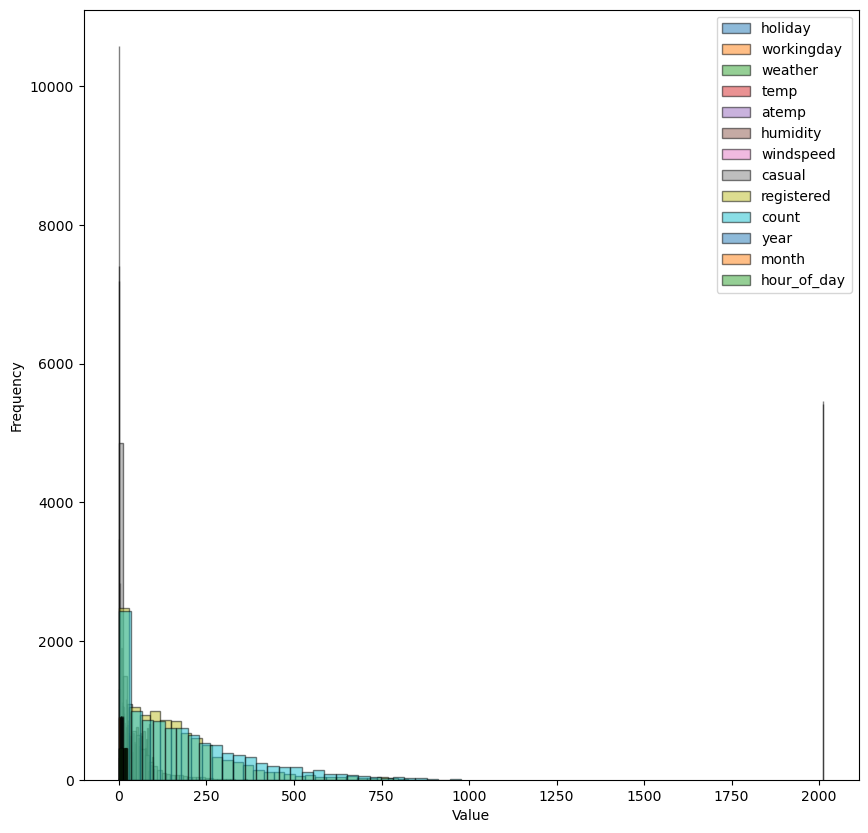

In [30]:
fig = plt.figure(figsize=(10, 10))

# Plot the histograms with transparency
for col in df_num:
    plt.hist(df[col], bins=30, alpha=0.5, label=col, edgecolor='black')


plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


plt.show()

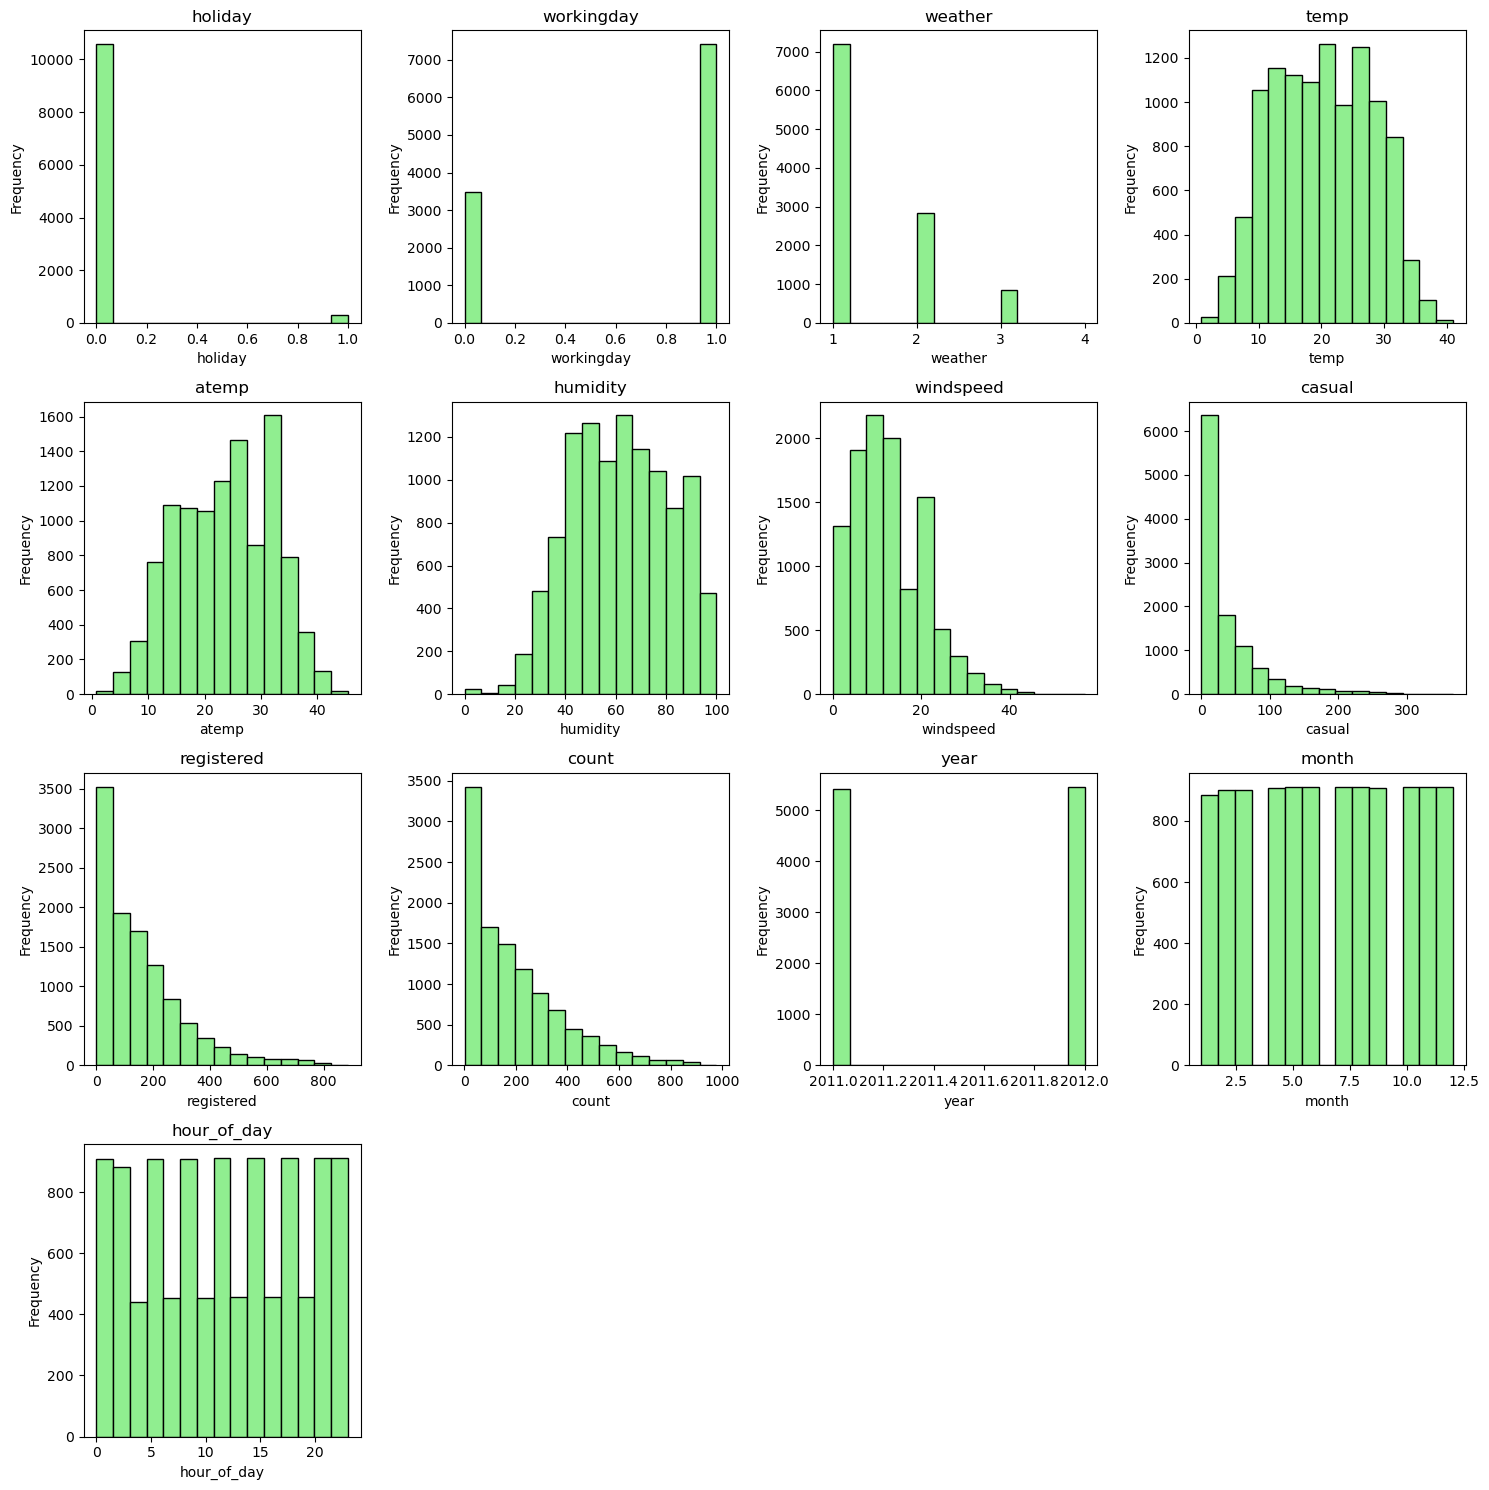

In [48]:
# Create a 4x4 grid of axes
fig, ax = plt.subplots(4, 4, figsize=(15, 15), sharex=False, sharey=False)

# Flatten the ax array for easy indexing
ax_flat = ax.flatten()

# Loop through the numerical columns and plot histograms in each axis
for i, col_name in enumerate(df_num.columns):
    # Plot the histogram in the corresponding axis
    ax_flat[i].hist(df_num[col_name], color="lightgreen", ec="black", bins=15)
    # Add the column name as the title
    ax_flat[i].set_title(col_name)
    # Add the column name as the x-axis label
    ax_flat[i].set_xlabel(col_name)
    # Add the frequency as the y-axis label
    ax_flat[i].set_ylabel("Frequency")

# Hide any unused subplots
for i in range(len(df_num.columns), len(ax_flat)):
    ax_flat[i].axis('off')

# Adjust layout for better fit
fig.tight_layout()

 
plt.show()


#### 2. Plot the distributions of all the numerical columns in the dataset using box plots.

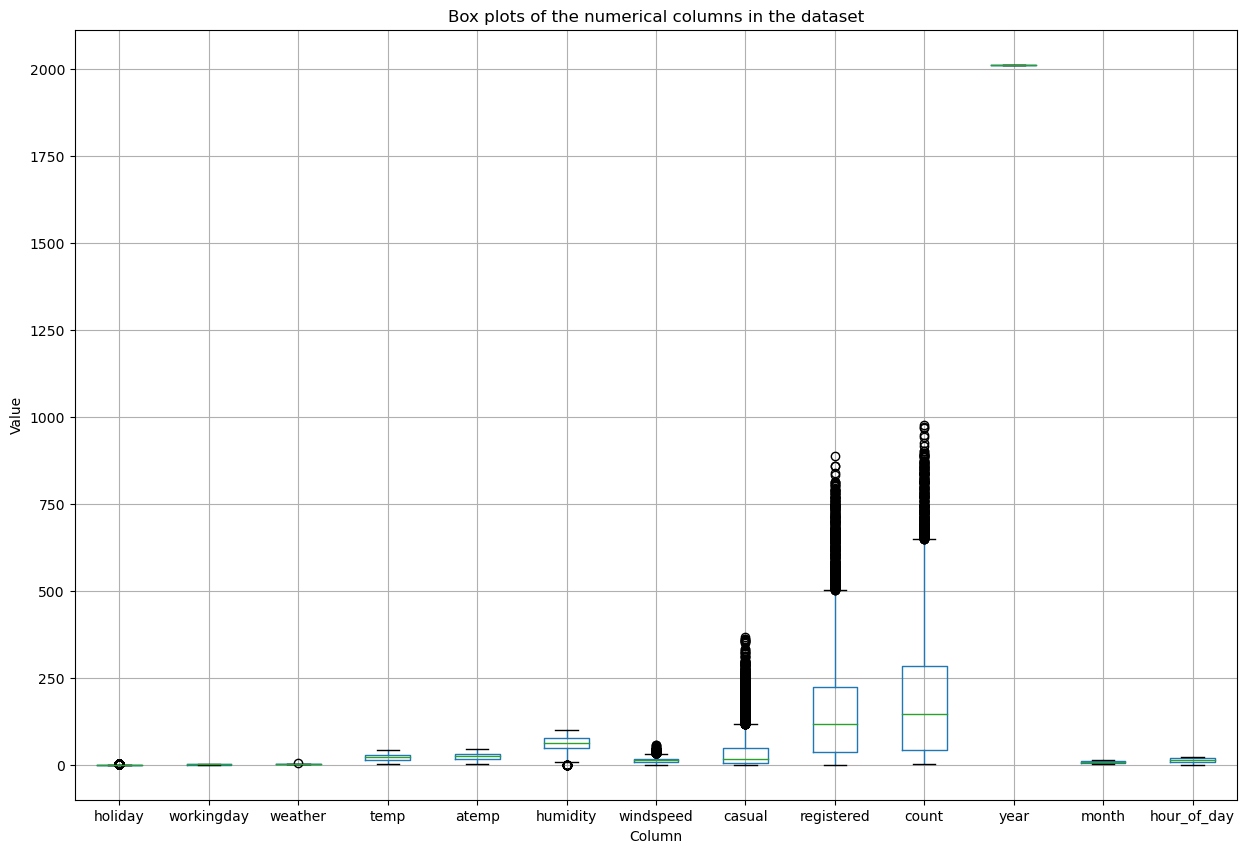

In [54]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the box plots for each numerical column
df.boxplot(ax=ax)

# Set the title and labels for the plot
ax.set_title('Box plots of the numerical columns in the dataset')
ax.set_xlabel('Column')
ax.set_ylabel('Value')

# Show the plot
plt.show()


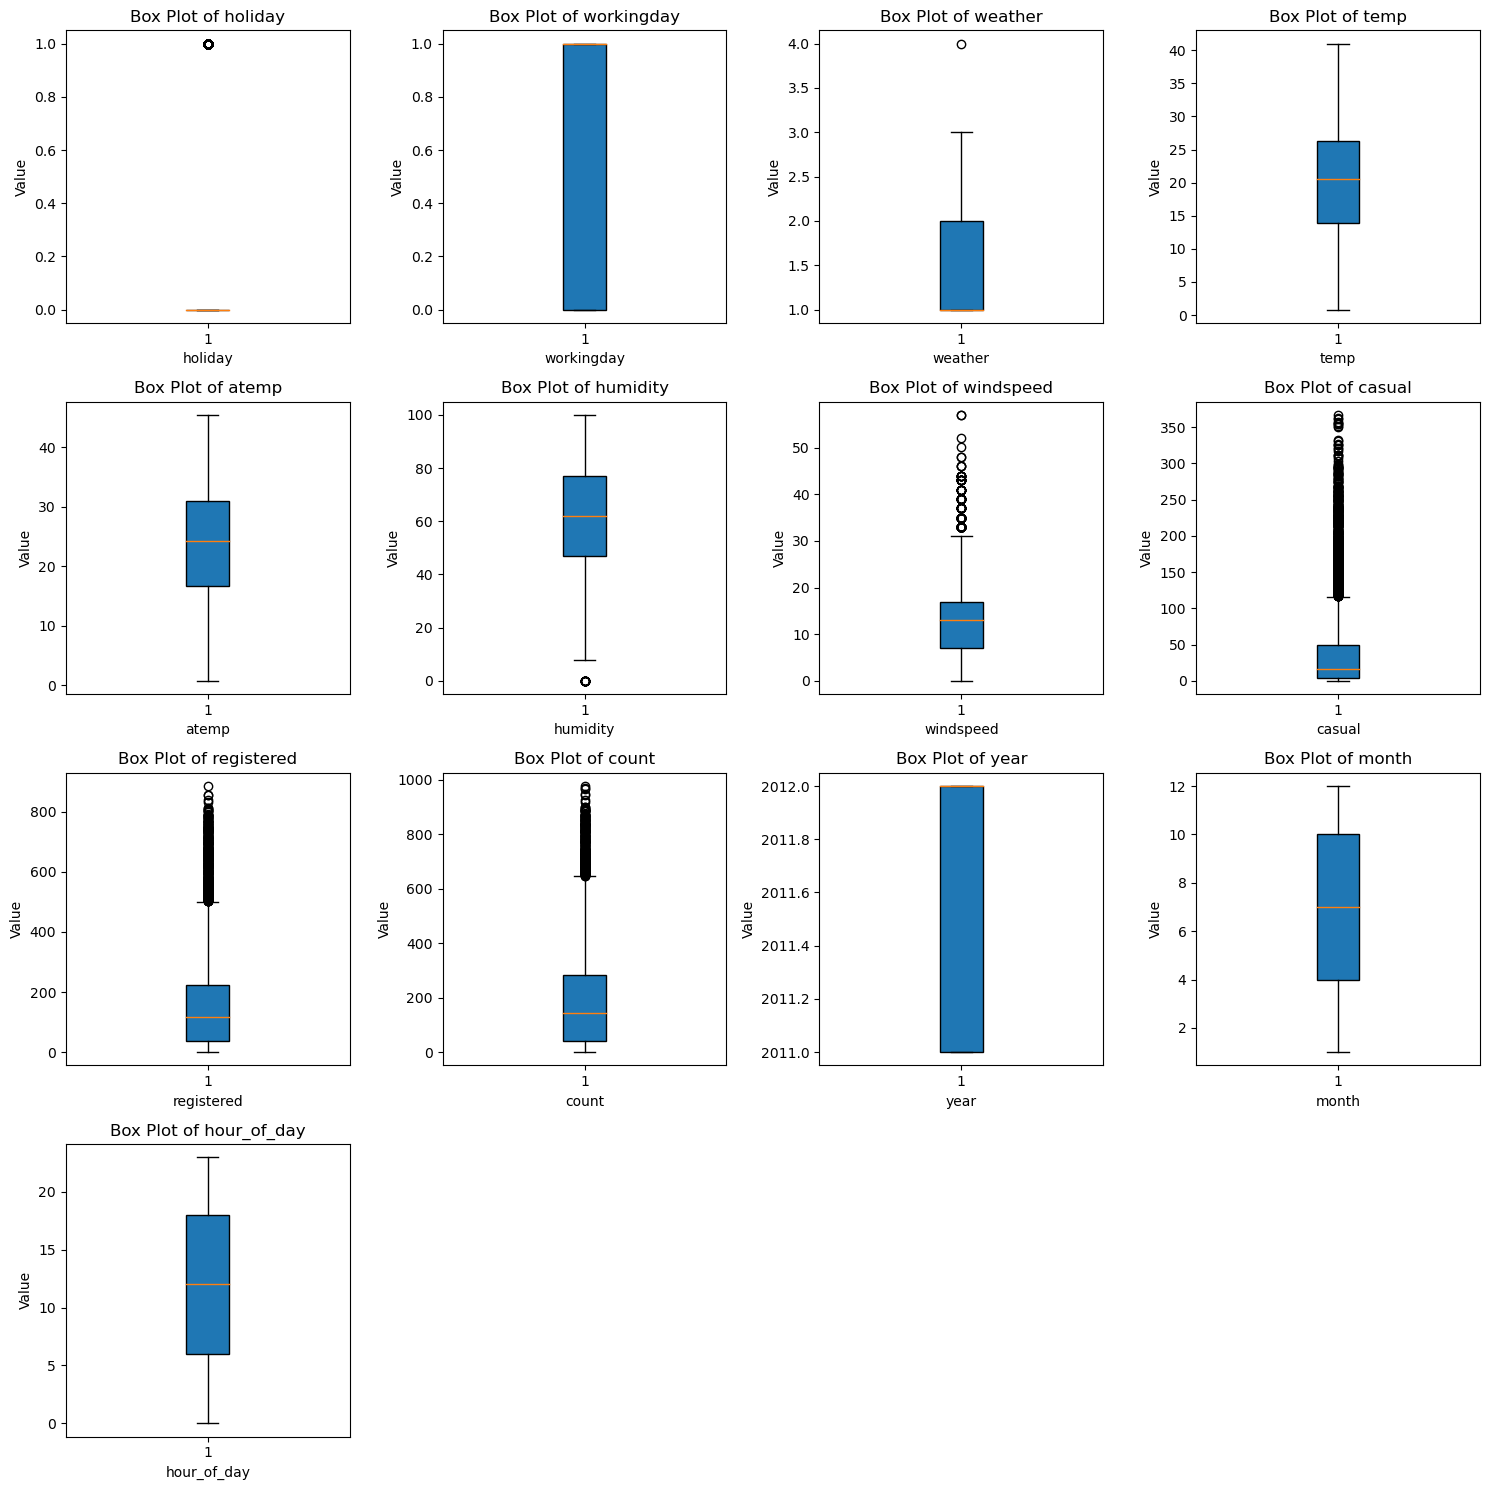

In [52]:
# Create a 4x4 grid of axes
fig, ax = plt.subplots(4, 4, figsize=(15, 15), sharex=False, sharey=False)


# Flatten the axes array for easy indexing
ax_flat = ax.flatten()

# Loop through the numerical columns and plot box plots in each axis
for i, col_name in enumerate(df_num.columns):
    # Create a box plot in the corresponding axis
    ax_flat[i].boxplot(df_num[col_name].dropna(), patch_artist=True)  # dropna() to avoid errors with NaN values
    # Add the column name as the title
    ax_flat[i].set_title(f'Box Plot of {col_name}')
    # Add the column name as the x-axis label
    ax_flat[i].set_xlabel(col_name)
    # Add 'Value' as the y-axis label
    ax_flat[i].set_ylabel("Value")

# Hide any unused subplots
for i in range(len(df_num.columns), len(ax_flat)):
    ax_flat[i].axis('off')

# Adjust layout for better fit
fig.tight_layout()



plt.show()

#### 3. Plot the the mean of the hourly total rentals count for working and non-working days.

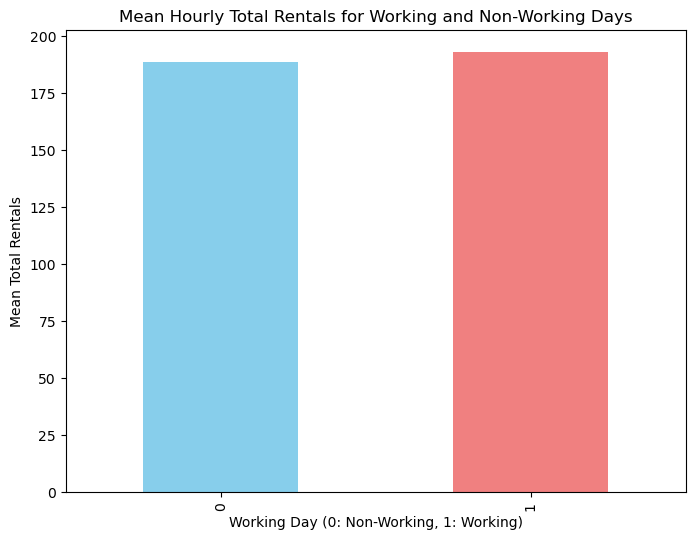

In [32]:
mean_rentals = df.groupby('workingday')['count'].mean()


fig, ax = plt.subplots(figsize=(8, 6))
mean_rentals.plot(kind='bar', color=['skyblue', 'lightcoral'], ax=ax)


ax.set_title('Mean Hourly Total Rentals for Working and Non-Working Days')
ax.set_xlabel('Working Day (0: Non-Working, 1: Working)')
ax.set_ylabel('Mean Total Rentals')


plt.show()

#### 4. Plot the the mean of the hourly total rentals count for the different months for both years combined.

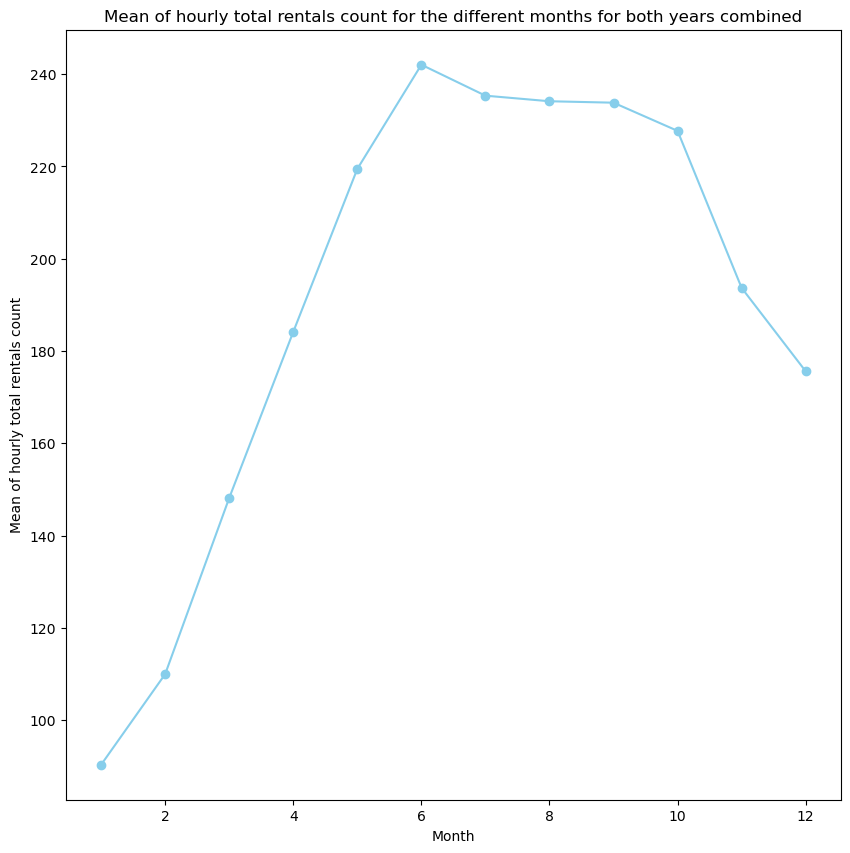

In [33]:
rentals_mean_monthly = df.groupby('month')['count'].mean()


fig, ax = plt.subplots(figsize=(10, 10))


ax.plot(rentals_mean_monthly.index, rentals_mean_monthly.values, color='skyblue', marker='o')


ax.set_xlabel('Month')
ax.set_ylabel('Mean of hourly total rentals count')
ax.set_title('Mean of hourly total rentals count for the different months for both years combined')



plt.show()

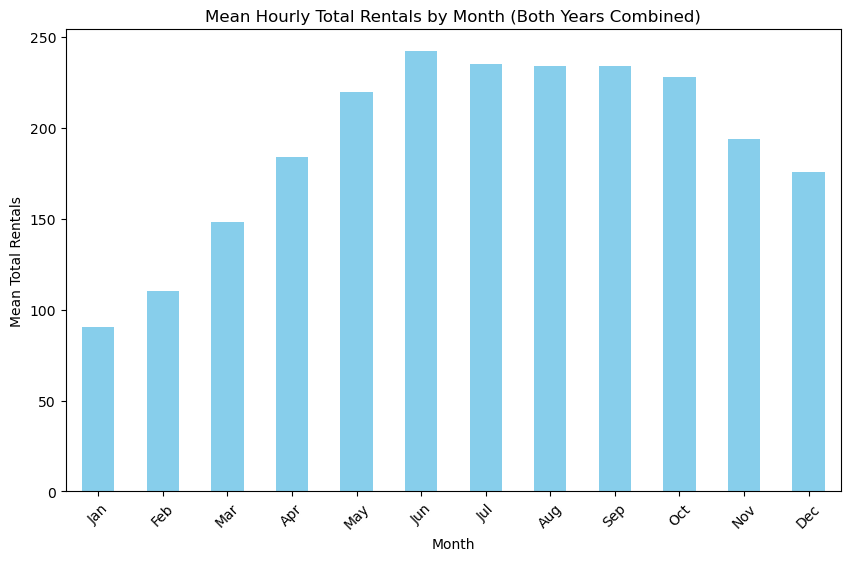

In [34]:
mean_rentals_by_month = df.groupby('month')['count'].mean()


fig, ax = plt.subplots(figsize=(10, 6))
mean_rentals_by_month.plot(kind='bar',color='skyblue', ax=ax)


ax.set_title('Mean Hourly Total Rentals by Month (Both Years Combined)')
ax.set_xlabel('Month')
ax.set_ylabel('Mean Total Rentals')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.show()

#### 5. Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

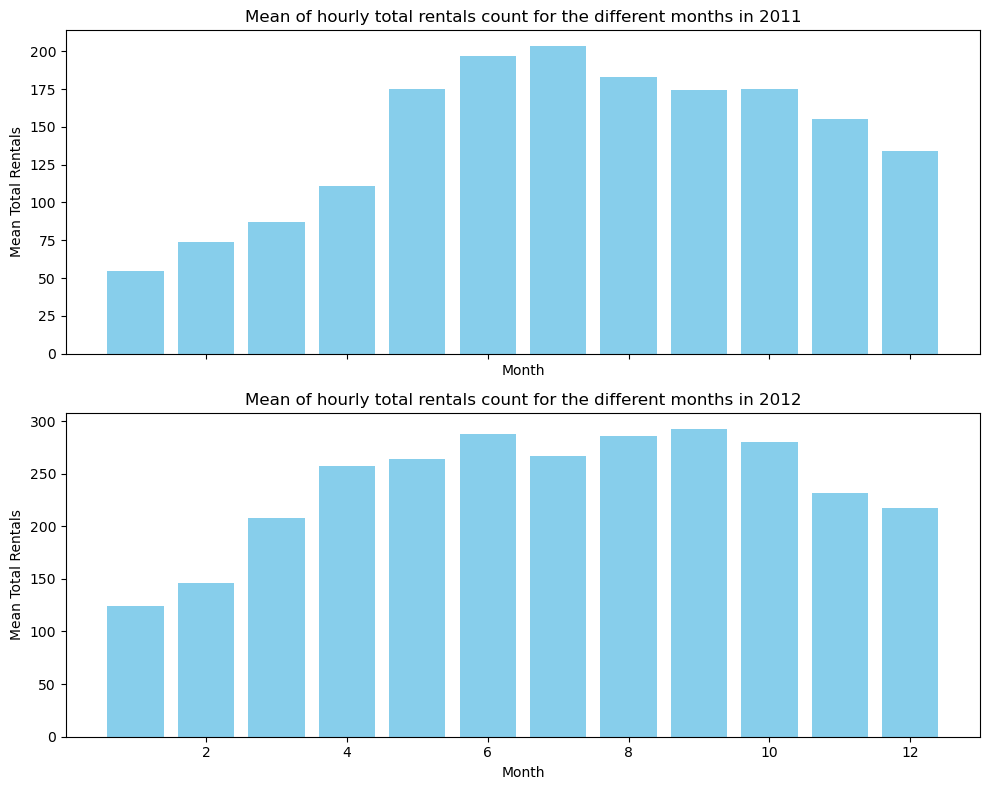

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

for i, year in enumerate(df['year'].unique()):
    subset_df = df[df['year'] == year]
    mean_rentals_by_month = subset_df.groupby('month')['count'].mean()

    # Plot bar plot for each year
    ax[i].bar(mean_rentals_by_month.index, mean_rentals_by_month, color='skyblue')
    ax[i].set_title(f'Mean of hourly total rentals count for the different months in {year}')
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Mean Total Rentals')


plt.tight_layout()
plt.show()

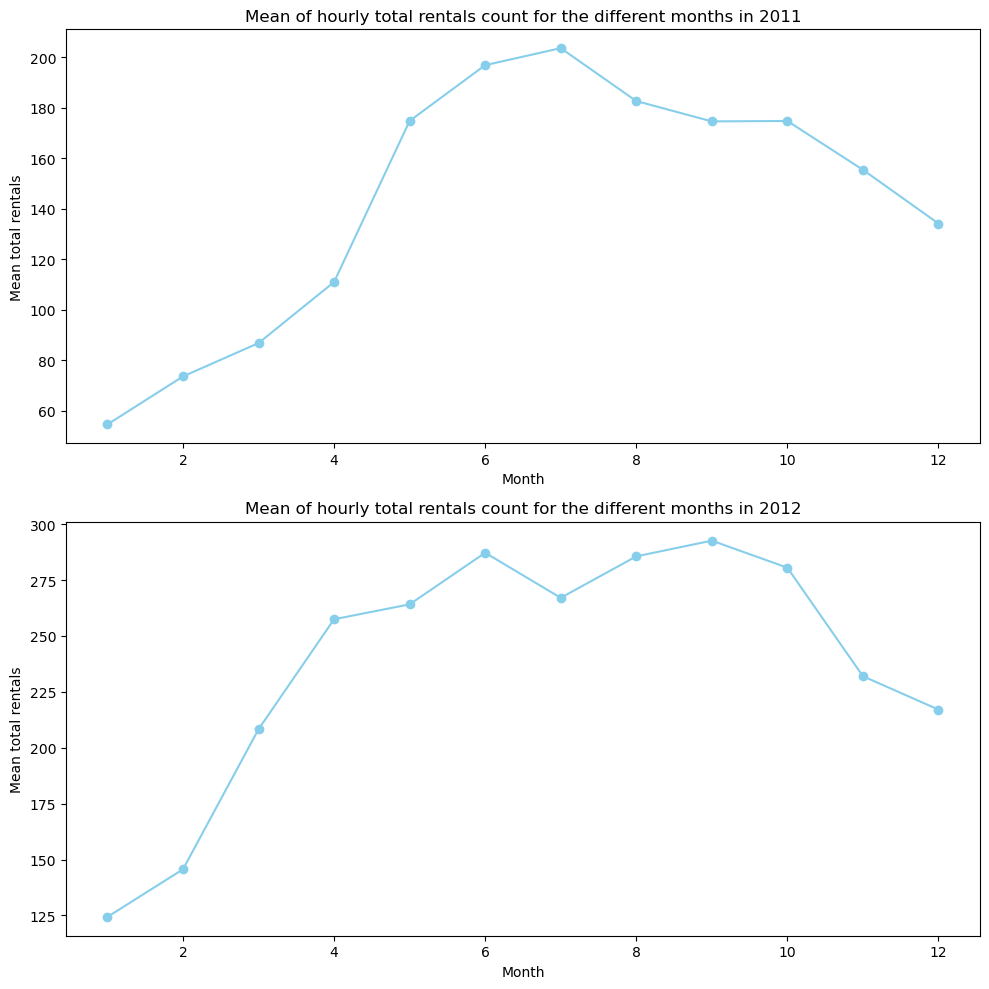

In [36]:
mean_rentals_by_month = df.groupby(['year', 'month'])['count'].mean()

fig, axs = plt.subplots(2, 1, figsize=(10, 10), tight_layout=True)

# Plot the data for each year on a different subplot
for i, year in enumerate(mean_rentals_by_month.index.levels[0]):
    # Get the data for the current year
    data = mean_rentals_by_month.loc[year]
    # Plot the data on the current subplot
    axs[i].plot(data.index, data.values, color='skyblue', marker='o')
    # Set the labels and title for the current subplot
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Mean total rentals')
    axs[i].set_title(f'Mean of hourly total rentals count for the different months in {year}')


plt.show()

#### 6. Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

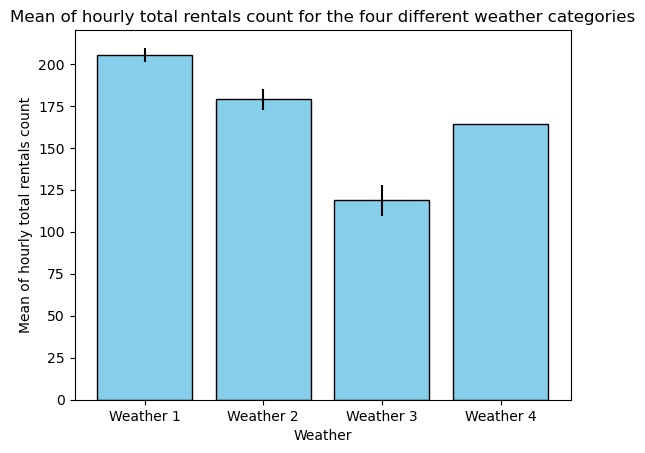

In [38]:
grouped = df.groupby('weather')['count'].agg(['mean', 'sem'])# sem- standard error of the mean
grouped['ci'] = grouped['sem'] * 1.96 # 95% confidence interval = standard error * 1.96 #ci-confidence level

fig, ax = plt.subplots()


ax.bar(grouped.index, grouped['mean'], yerr=grouped['ci'], color='skyblue', edgecolor='black')


ax.set_xlabel('Weather')
ax.set_ylabel('Mean of hourly total rentals count')
ax.set_title('Mean of hourly total rentals count for the four different weather categories')

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Weather 1', 'Weather 2', 'Weather 3', 'Weather 4'])




plt.show()

The output shows the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories.

The mean is the average number of hourly total rentals for each weather category. The 95% confidence level means that we can be 95% sure that the true mean is within the range shown by the black lines on top of the bars.The confidence level depends on the sample size and the variability of the data. A larger sample size and lower variability will result in a narrower confidence level.

From the bar chart, it can be observe that:

The mean of the hourly total rentals count is highest for weather category 1 (clear, few clouds, partly cloudy, partly cloudy), followed by category 2 (mist + cloudy, mist + broken clouds, mist + few clouds, mist),category 4 (heavy rain + ice pallets + thunderstorm + mist, snow + fog) and  category 3 (light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds)

The 95% confidence interval is narrowest for weather category 1, indicating that the data is more consistent and reliable for this category. The 95% confidence interval is widest for weather category 3, indicating that the data is more variable and uncertain for this category.

If the confidence intervals are not present like in category 4, it means that either the error bars are too small to be visible, the error bars are zero, or the error bars are missing.

#### 7. Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count ?

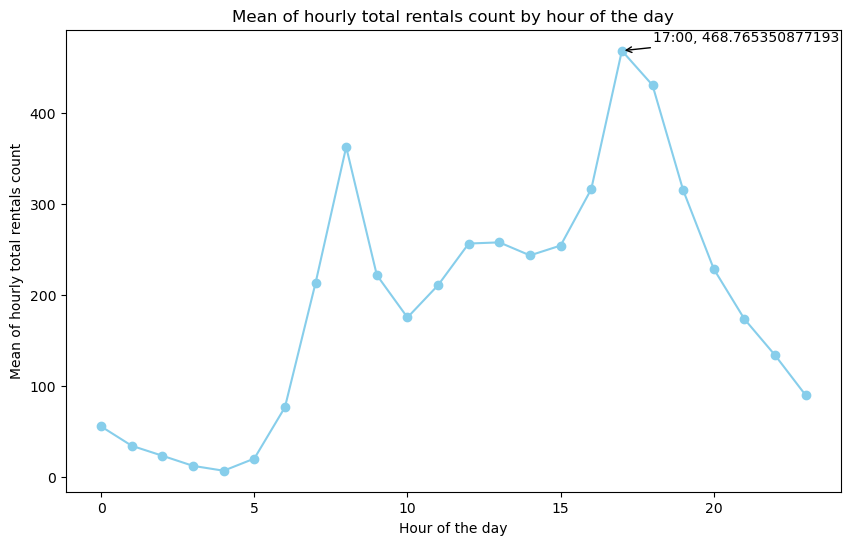

In [39]:

mean_rentals_by_hour = df.groupby('hour_of_day')['count'].mean()

fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(mean_rentals_by_hour.index, mean_rentals_by_hour.values, color='skyblue', marker='o')

# the hour and the value of the maximum rentals count
max_hour = mean_rentals_by_hour.idxmax()
max_value = mean_rentals_by_hour.max()

# Annotate the maximum point with the hour and the value
ax.annotate(f'{max_hour}:00, {max_value}', xy=(max_hour, max_value), xytext=(max_hour+1, max_value+10),
            arrowprops=dict(arrowstyle='->', color='black'))


ax.set_title('Mean of hourly total rentals count by hour of the day')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Mean of hourly total rentals count')


plt.show()


From the plot, it can be observe that the hour of the day with the highest rentals count is 17:00, with a mean value of 461.45. This is the peak hour of commuting in the evening.

#### 8. Repeat the plot in 7 for different days of the week. What patterns can you observe ?

Plot the the mean of the hourly total rentals count versus the hour of the day for different days of the week and for the four seasons using a multi-panel figure..What patterns csn you observe

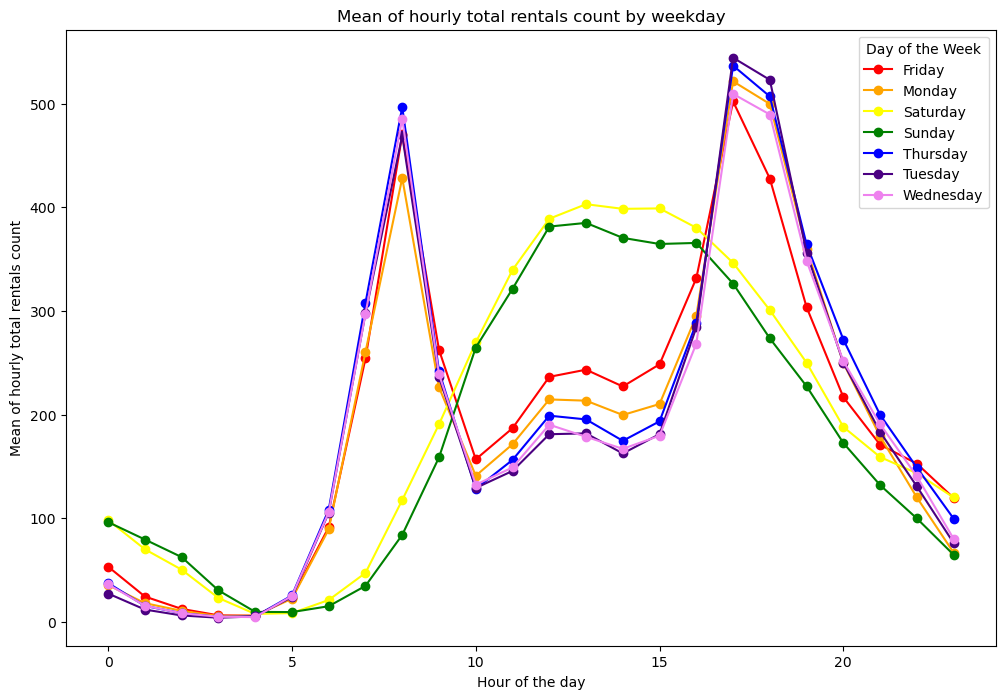

In [40]:
mean_rental_weeks = df.groupby(['day_of_the_week', 'hour_of_day'])['count'].mean()


fig, ax = plt.subplots(figsize=(12, 8))


colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Loop over the weekdays and plot the data with a line plot
for i, weekday in enumerate(mean_rental_weeks.index.levels[0]):
    # Get the data for the current weekday
    data = mean_rental_weeks.loc[weekday]
    # Plot the data with a line plot
    ax.plot(data.index, data.values, color=colors[i], marker='o', label=weekday)


ax.set_title('Mean of hourly total rentals count by weekday')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Mean of hourly total rentals count')
ax.legend(title='Day of the Week')


plt.show()


Some of the patterns that can be observed from the plot are:

The mean of hourly total rentals count is higher on weekdays than on weekends, indicating a weekly pattern related to working days and holidays.

The mean of hourly total rentals count is higher during the peak hours of commuting, such as 8 am and 5 pm, indicating a daily pattern related to work and leisure activities.

The mean of hourly total rentals count varies by weekday, with Monday and Friday having lower values than the other weekdays, indicating a possible difference in work schedules or preferences.

#### 9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?

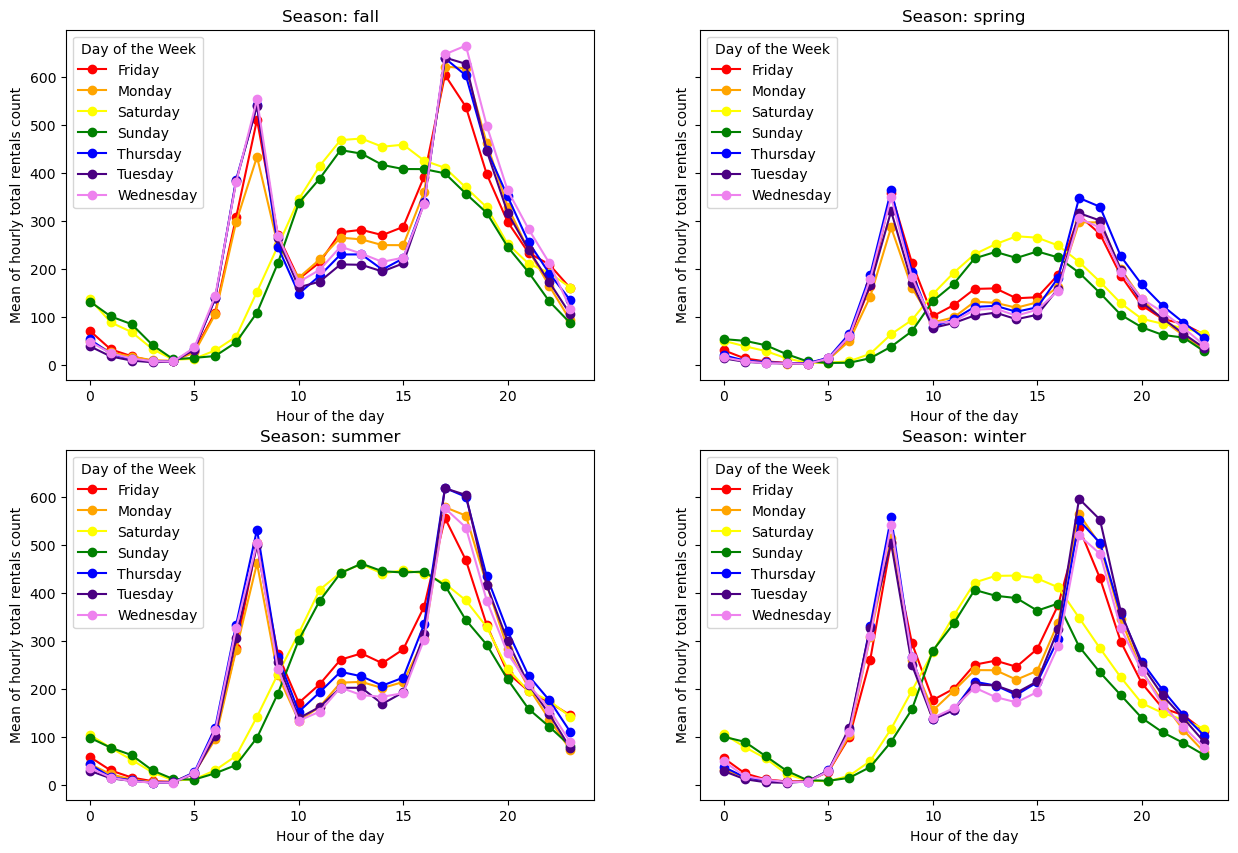

In [41]:
Mean_rentals_grouped = df.groupby(['season', 'day_of_the_week', 'hour_of_day'])['count'].mean()


fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)


colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Loop over the seasons and weekdays and plot the data with a line plot on each subplot
for i, season in enumerate(Mean_rentals_grouped.index.levels[0]):
    for j, weekday in enumerate(Mean_rentals_grouped.index.levels[1]):
        # Get the data for the current season and weekday
        data = Mean_rentals_grouped.loc[season, weekday]
        # Plot the data with a line plot on the current subplot
        axs[i // 2, i % 2].plot(data.index, data.values, color=colors[j], marker='o', label=weekday)
        # Set the titles, labels, and legend for the current subplot
        axs[i // 2, i % 2].set_title(f'Season: {season}')
        axs[i // 2, i % 2].set_xlabel('Hour of the day')
        axs[i // 2, i % 2].set_ylabel('Mean of hourly total rentals count')
        axs[i // 2, i % 2].legend(title='Day of the Week')

plt.show()


Some of the patterns that can be observed from the plot are:

The mean of hourly total rentals count is higher in summer and lower in spring, indicating a seasonal pattern related to weather and temperature.

The mean of hourly total rentals count varies by season and weekday, with some combinations having higher or lower values than others, indicating a possible interaction effect between season and weekday.

#### 10. Plot the the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? Does this peak period differ for working and non-working days ?

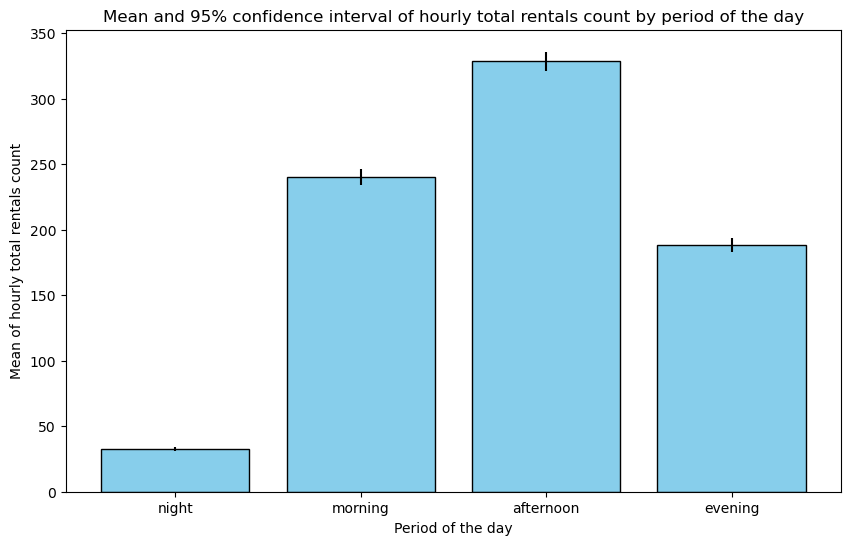

In [44]:
mean_rental_dayperiod = df.groupby('day_period')['count'].agg(['mean', 'sem'])
mean_rental_dayperiod['ci'] = mean_rental_dayperiod['sem'] * 1.96

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(mean_rental_dayperiod.index, mean_rental_dayperiod['mean'], yerr=mean_rental_dayperiod['ci'], color='skyblue', edgecolor='black')


ax.set_title('Mean and 95% confidence interval of hourly total rentals count by period of the day')
ax.set_xlabel('Period of the day')
ax.set_ylabel('Mean of hourly total rentals count')

plt.show()



This graph shows the mean and 95% confidence interval of the hourly total rentals count by different periods of the day. It is a bar chart with error bars that indicate the uncertainty in the mean values

The graph shows that the rental counts are lowest during the night, increase in the morning, peak in the afternoon, and then decrease again in the evening. This suggests that most people use bikes during the daytime, especially in the afternoon.

The graph also shows that the confidence intervals for the night and evening periods are shorter than for the morning and afternoon periods. This means that there is less variation or spread in the rental counts during the night and evening than during the morning and afternoon. This could be due to different factors, such as weather, traffic, user type, etc.

#### 11. Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make ?

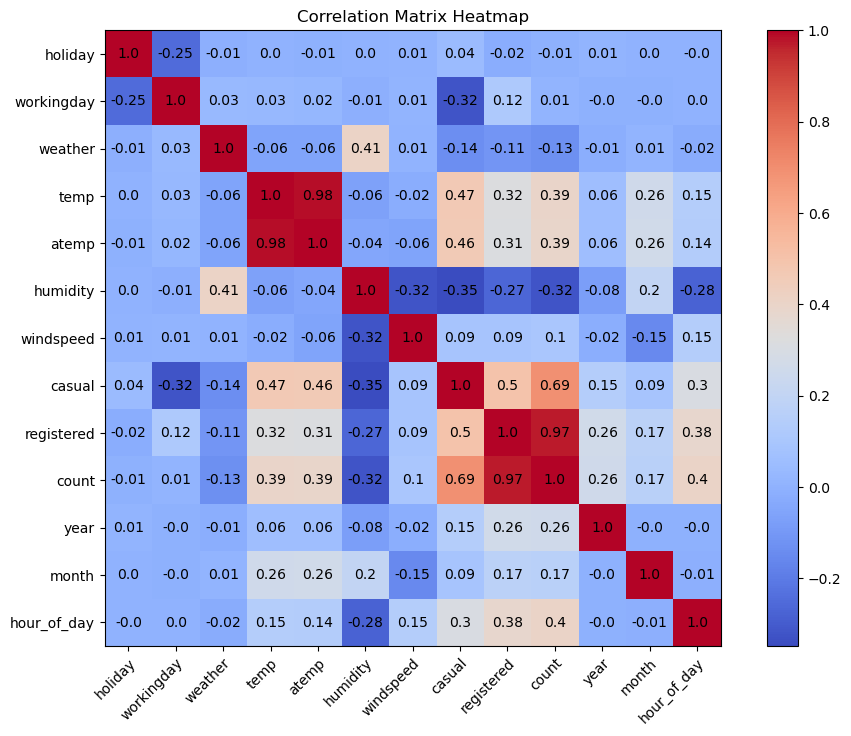

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))


correlation_matrix = df_num.corr()

# Create heatmap using imshow
cax = ax.imshow(correlation_matrix, cmap='coolwarm')


fig.colorbar(cax)


ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))


ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotate x tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell with the numeric value
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("Correlation Matrix Heatmap")


plt.show()


The correlations are represented by colors ranging from dark red for strong positive correlations to dark blue for strong negative correlations.

Some of the observations that can be made are:

There is a strong positive correlation between “temp” and “atemp”, indicating that the temperature and the apparent temperature are highly related.

There is a strong positive correlation between “registered” and “count”, indicating that the number of registered users is the main contributor to the total rental count.

There is a strong negative correlation between “humidity” and “count”, indicating that the higher the humidity, the lower the rental demand.

There is a moderate positive correlation between “hour_of_day” and “casual”, indicating that the number of casual users increases during the day.